In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from wordcloud import WordCloud, STOPWORDS


In [3]:
df = pd.read_csv('../data_cleaning/cleaned_ba_data.csv', index_col=0)
df.date = pd.to_datetime(df['date'], format='mixed')

In [38]:
df = df.reset_index(drop=True)

In [39]:
df.shape

(3593, 7)

In [13]:
# AVERAGE RATING FOR THE AIRLINE
df.stars.mean()

4.762593932646813

Text(0.5, 0.98, 'Total number of reviews with each rating')

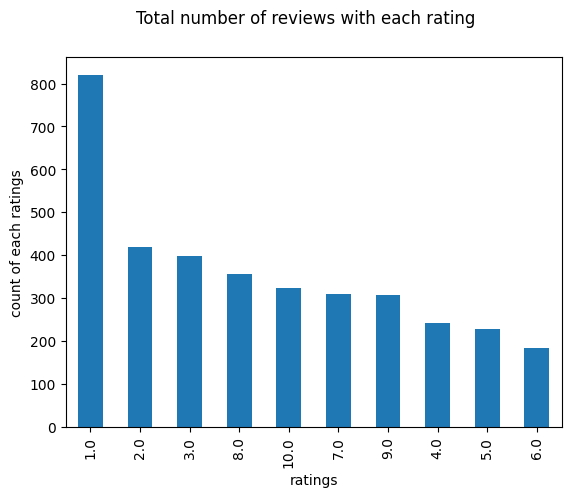

In [27]:
df.stars.value_counts().plot(kind='bar')
plt.xlabel('ratings')
plt.ylabel('count of each ratings')
plt.suptitle('Total number of reviews with each rating')

In [45]:
df_ratings = pd.DataFrame(df.stars.value_counts())
df_ratings = df_ratings.reset_index()

In [54]:
df_ratings

,stars,count
0,1.0,820
1,2.0,420
2,3.0,398
3,8.0,357
4,10.0,324
5,7.0,309
6,9.0,308
7,4.0,243
8,5.0,229
9,6.0,185


In [63]:
#  CONVERT RATINGS TO PERCENTAGE, ROUNDED TO 2 AND MAKE A NEW DATAFRAME
pct_value = (df_ratings['count'].values / df_ratings['count'].sum() *100).tolist()
pct_value = [round(x, 2) for x in pct_value]
df_ratings['pct_values'] = pct_value

In [69]:
df_ratings

,stars,count,pct_values
0,1.0,820,22.82
1,2.0,420,11.69
2,3.0,398,11.08
3,8.0,357,9.94
4,10.0,324,9.02
5,7.0,309,8.60
6,9.0,308,8.57
7,4.0,243,6.76
8,5.0,229,6.37
9,6.0,185,5.15


Text(0.5, 1.0, 'percentage value of ratings')

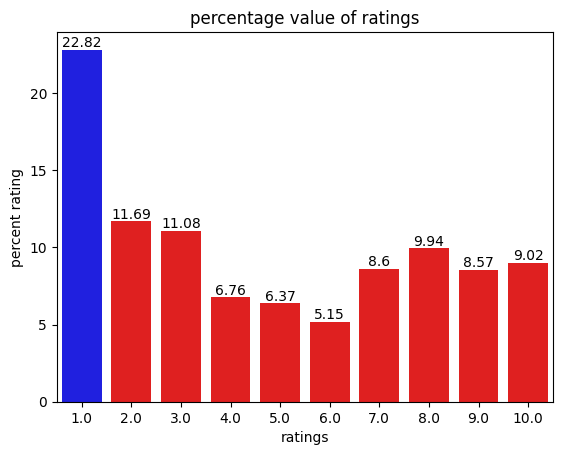

In [85]:
clrs = ['blue' if (x == max(df_ratings.pct_values)) else 'red' for x in df_ratings.pct_values]
ax = sns.barplot(x=df_ratings.stars, y=df_ratings.pct_values, data=df_ratings, palette=clrs, errwidth=0 )

ax.bar_label(ax.containers[0])
ax.set_ylabel('percent rating')
ax.set_xlabel('ratings')
ax.set_title('percentage value of ratings')

In [88]:
print(f"{df.country.nunique()} unique countries")

71 unique countries


In [95]:
df_country = pd.DataFrame(df.country.value_counts()).reset_index()

In [103]:
df_country.head()

,country,count
0,united kingdom,2262
1,united states,394
2,australia,155
3,canada,111
4,germany,60


In [153]:
df_country[df_country['country'] == 'germany']

,country,count
4,germany,60


Text(0.5, 1.0, 'Total number of review per country')

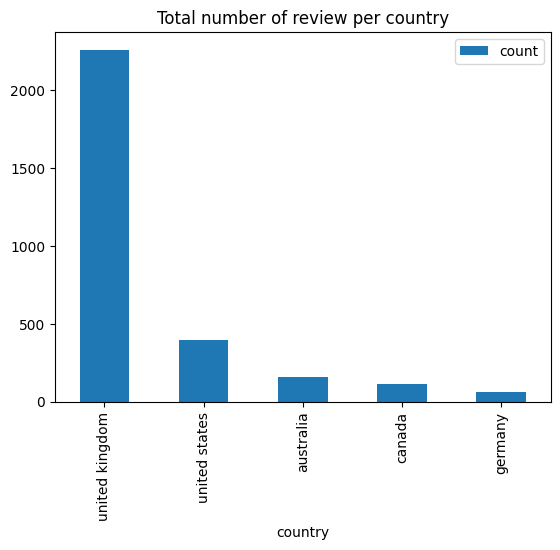

In [111]:
df_country.head().plot(kind='bar', x='country')
plt.title('Total number of review per country')

In [125]:
df_country_rating = df[['country', 'stars']]
df_country_rating = df_country_rating.groupby('country').mean()['stars'].sort_values(ascending=False).reset_index()

In [140]:
#  rename the columns to fit the description
df_country_rating.rename(columns={'stars': 'average_rating'}, inplace=True)

Text(0.5, 1.0, 'Highest average ratings per country')

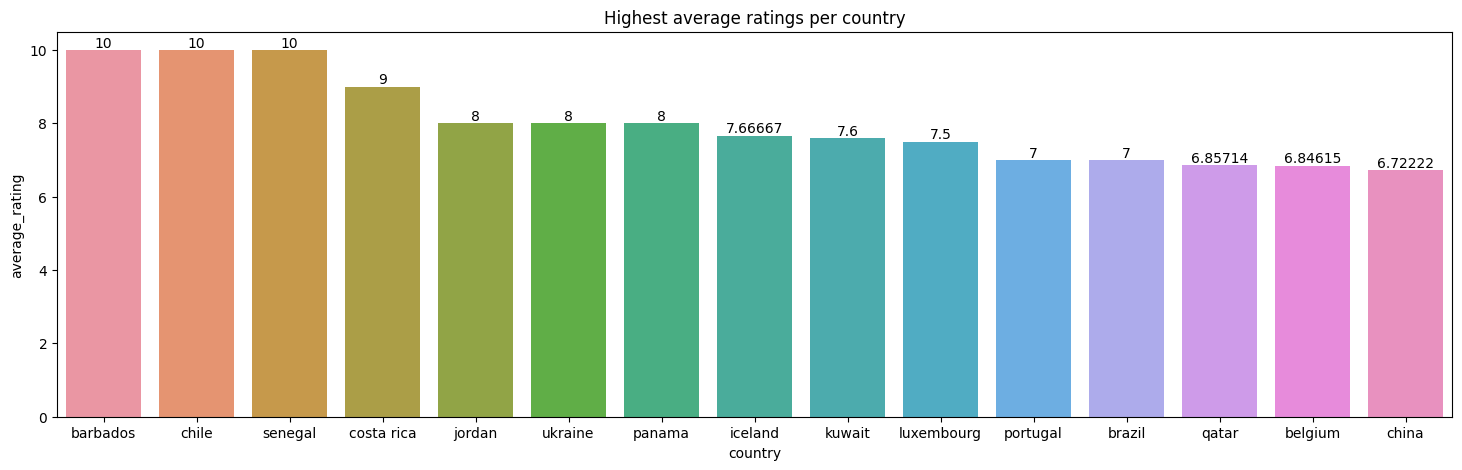

In [142]:
fig, ax = plt.subplots(figsize=(18,5))
ax1 = sns.barplot(data=df_country_rating[:15],x='country', y='average_rating')
ax.bar_label(ax.containers[0])
ax.set_title('Highest average ratings per country')

In [149]:
df_country_rating1 = df_country_rating.groupby('country').mean()['average_rating'].sort_values(ascending=True).reset_index()

Text(0.5, 1.0, 'Lowest average ratings per country')

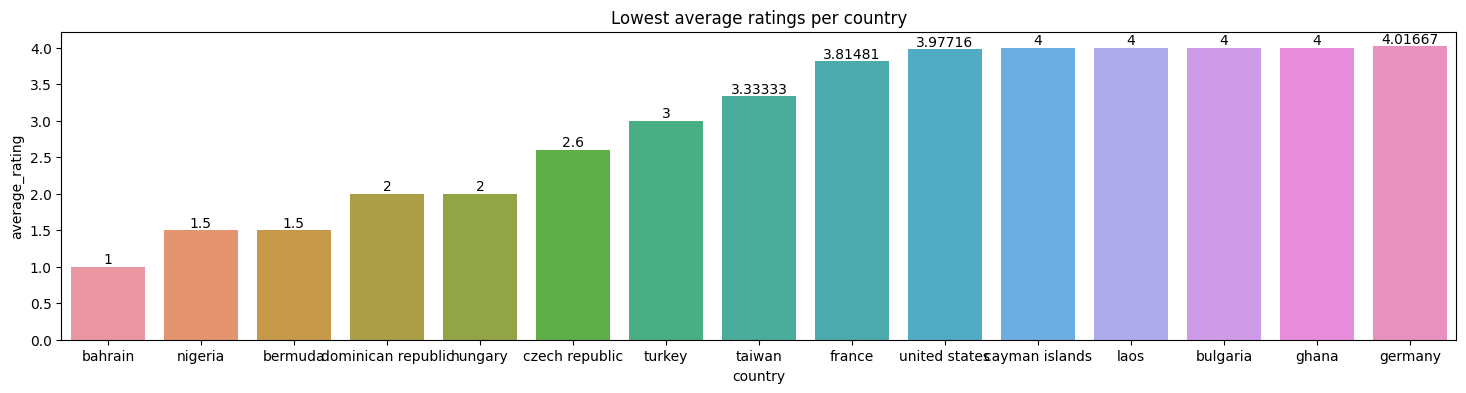

In [151]:
fig, ax = plt.subplots(figsize=(18,4))
ax1 = sns.barplot(data=df_country_rating1[:15],x='country', y='average_rating')
ax.bar_label(ax.containers[0])
ax.set_title('Lowest average ratings per country')

##### Time series analysis

In [4]:
import plotly.express as px

In [7]:
fig = px.line(df, x='date', y='stars')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [5]:
import nltk
import re

from nltk.corpus import stopwords

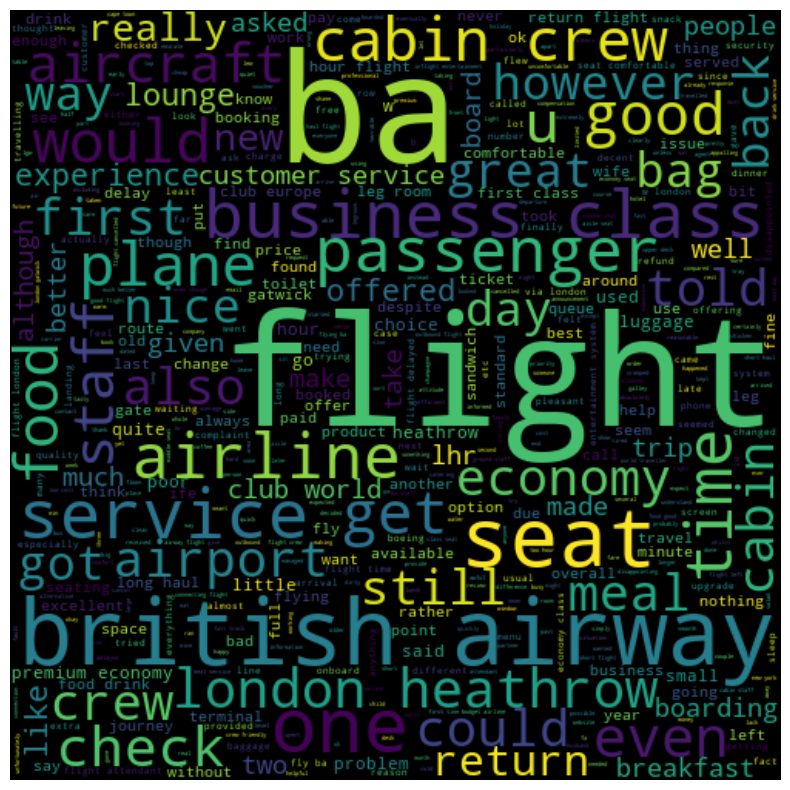

In [37]:
plt.figure(figsize=(20,10))
# combine all the words as a sentence
reviews = " ".join(df.corpus)
stopwords = set(stopwords.words('english'))

# create wordcloud image
wordcloud = WordCloud(height=500, width=500, max_font_size=100, max_words=500,stopwords=stopwords).generate(reviews)

# display the image generated
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

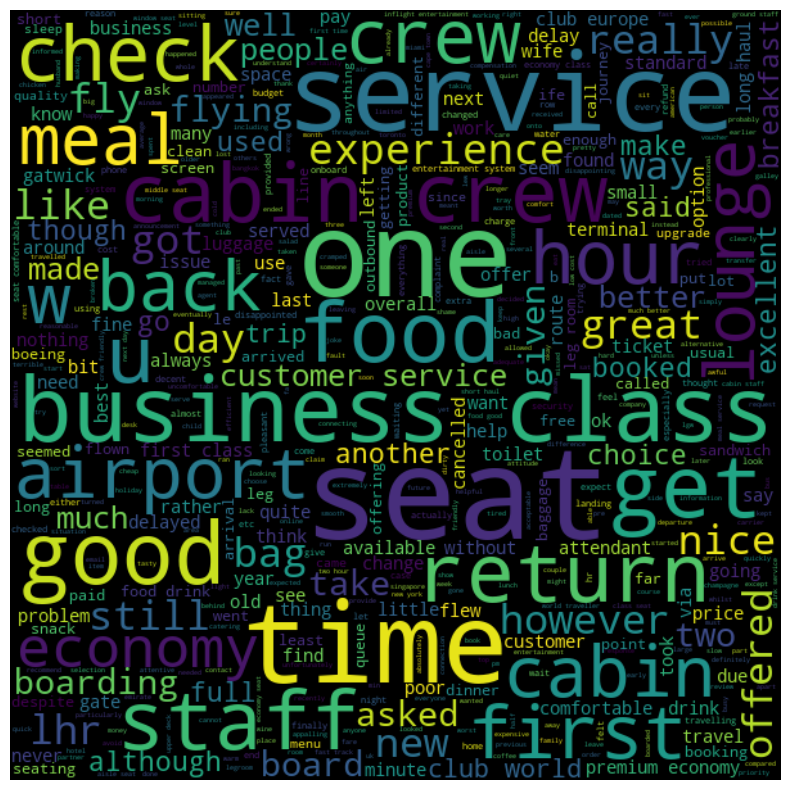

In [6]:
plt.figure(figsize=(20,10))
# combine all the words as a sentence
reviews = " ".join(df.corpus)

stopwords = set(stopwords.words('english'))
# Update the stopwords to improve wordcloud clarity
stopwords.update(["ba","flight", "british","airway", "airline","plane", "told","also","passenger", "london", "heathrow", "aircraft", "could","even", "would"])


# create wordcloud image
wordcloud = WordCloud(height=600, width=600, max_font_size=100, max_words=500,stopwords=stopwords).generate(reviews)

# display the image generated
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [7]:
# WORD FREQUENCY
from nltk import ngrams, bigrams
from nltk.probability import FreqDist

from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer

In [9]:
# split all the words into a split of words

words = reviews.split(" ")

# update the stopwords with words not necessary to understand of the data 
stopwords = text.ENGLISH_STOP_WORDS.union(["ba","flight", "british","airway", "airline","plane", "told","also","passenger", "london", "heathrow", "aircraft", "could","even", "would"])

new_words = [word for word in words if word not in stopwords]

nlp_words = FreqDist(new_words).most_common(25)

# convert the frequency distribution to dataframe
new_fqdist = pd.Series(dict(nlp_words))

Text(0.5, 1.0, 'Frequency of word distribution')

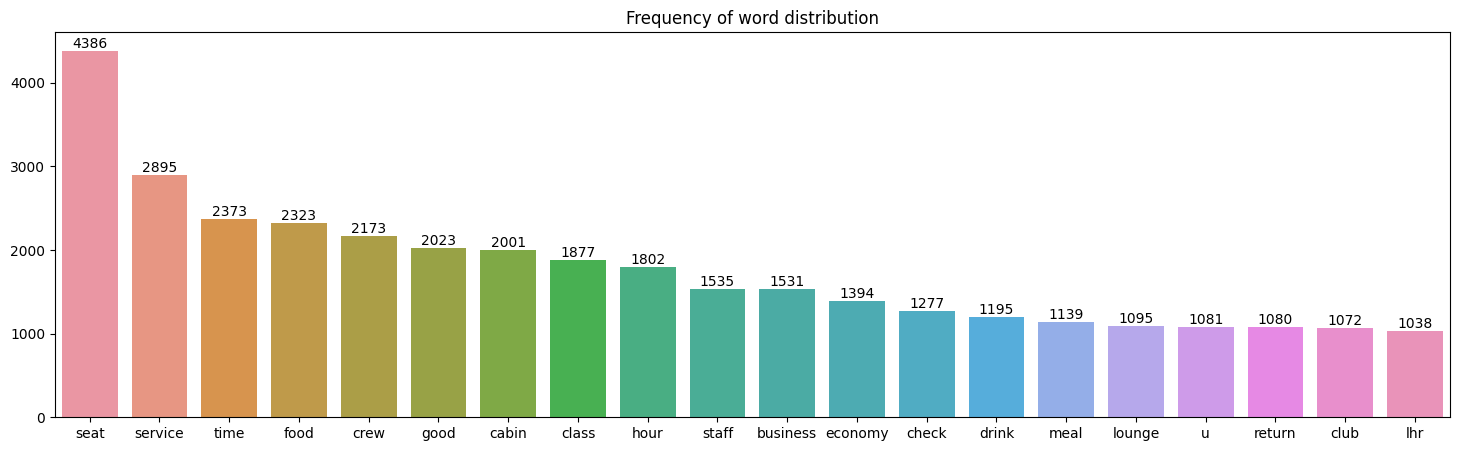

In [53]:
fig, ax = plt.subplots(figsize=(18,5))
ax2 = sns.barplot(x=new_fqdist[:20].index, y=new_fqdist[:20].values, ax=ax)
ax.bar_label(ax2.containers[0])
ax.set_title('Frequency of word distribution')
# plt.xticks(rotation=30)

##### WORD FREQUENCY WITH NGRAMS

In [ ]:
import nltk.collocations as collac

In [10]:
len(new_words), len(words)

(238647, 297894)

In [15]:
from nltk import ngrams, bigrams

#  generate bigrams
n_grams = ngrams(new_words, 2)

#  frequency distribution
ngram_fd = FreqDist(n_grams).most_common(40)

# sort values based on highest frequency
sorted_ngram = {k:v for k, v in sorted(ngram_fd, key=lambda item:item[1])}

# join values with _ for easy sorting based on highest frequency
joined_ngram = {"_".join(k):v for k, v in sorted(ngram_fd, key=lambda item:item[1])}

#  convert to dataframe series
ngram_freqdist = pd.Series(joined_ngram)
plt.figure(figsize=(15,8))
ngram_freqdist.plot(kind='barh')



In [91]:
ngram_fd

[(('business', 'class'), 1076),
 (('cabin', 'crew'), 860),
 (('customer', 'service'), 444),
 (('club', 'world'), 380),
 (('premium', 'economy'), 377),
 (('club', 'europe'), 300),
 (('long', 'haul'), 295),
 (('leg', 'room'), 237),
 (('food', 'drink'), 227),
 (('seat', 'comfortable'), 187),
 (('economy', 'class'), 179),
 (('middle', 'seat'), 156),
 (('inflight', 'entertainment'), 154),
 (('class', 'seat'), 150),
 (('low', 'cost'), 146),
 (('short', 'haul'), 143),
 (('window', 'seat'), 138),
 (('ground', 'staff'), 128),
 (('cabin', 'staff'), 128),
 (('delayed', 'hour'), 126),
 (('meal', 'service'), 126),
 (('upper', 'deck'), 125),
 (('food', 'good'), 124),
 (('world', 'traveller'), 117),
 (('crew', 'friendly'), 112),
 (('economy', 'seat'), 112),
 (('fast', 'track'), 109),
 (('aisle', 'seat'), 104),
 (('drink', 'service'), 96),
 (('new', 'york'), 91),
 (('cape', 'town'), 90),
 (('service', 'good'), 87),
 (('crew', 'member'), 86),
 (('boarding', 'pas'), 83),
 (('bag', 'drop'), 83),
 (('trav

In [98]:
joined_ngram

{'hour_late': 80,
 'year_old': 80,
 'good_service': 81,
 'boarding_pas': 83,
 'bag_drop': 83,
 'traveller_plus': 83,
 'priority_boarding': 83,
 'crew_member': 86,
 'service_good': 87,
 'cape_town': 90,
 'new_york': 91,
 'drink_service': 96,
 'aisle_seat': 104,
 'fast_track': 109,
 'crew_friendly': 112,
 'economy_seat': 112,
 'world_traveller': 117,
 'food_good': 124,
 'upper_deck': 125,
 'delayed_hour': 126,
 'meal_service': 126,
 'ground_staff': 128,
 'cabin_staff': 128,
 'window_seat': 138,
 'short_haul': 143,
 'low_cost': 146,
 'class_seat': 150,
 'inflight_entertainment': 154,
 'middle_seat': 156,
 'economy_class': 179,
 'seat_comfortable': 187,
 'food_drink': 227,
 'leg_room': 237,
 'long_haul': 295,
 'club_europe': 300,
 'premium_economy': 377,
 'club_world': 380,
 'customer_service': 444,
 'cabin_crew': 860,
 'business_class': 1076}

In [11]:
def get_freq_dist(words, number_of_ngrams):

    from nltk import ngrams

    # generate ngrams
    n_grams = ngrams(words, number_of_ngrams)
    
    #  frequency distribution
    ngram_fd = FreqDist(n_grams).most_common(40)

    # join values with _ for easy sorting based on highest frequency
    joined_ngram = {"_".join(k):v for k, v in sorted(ngram_fd, key=lambda item:item[1])}

    #  convert to dataframe series
    ngram_freqdist = pd.Series(joined_ngram)
    plt.figure(figsize=(15,8))
    ax = ngram_freqdist.plot(kind='barh')

    return ax


<Axes: >

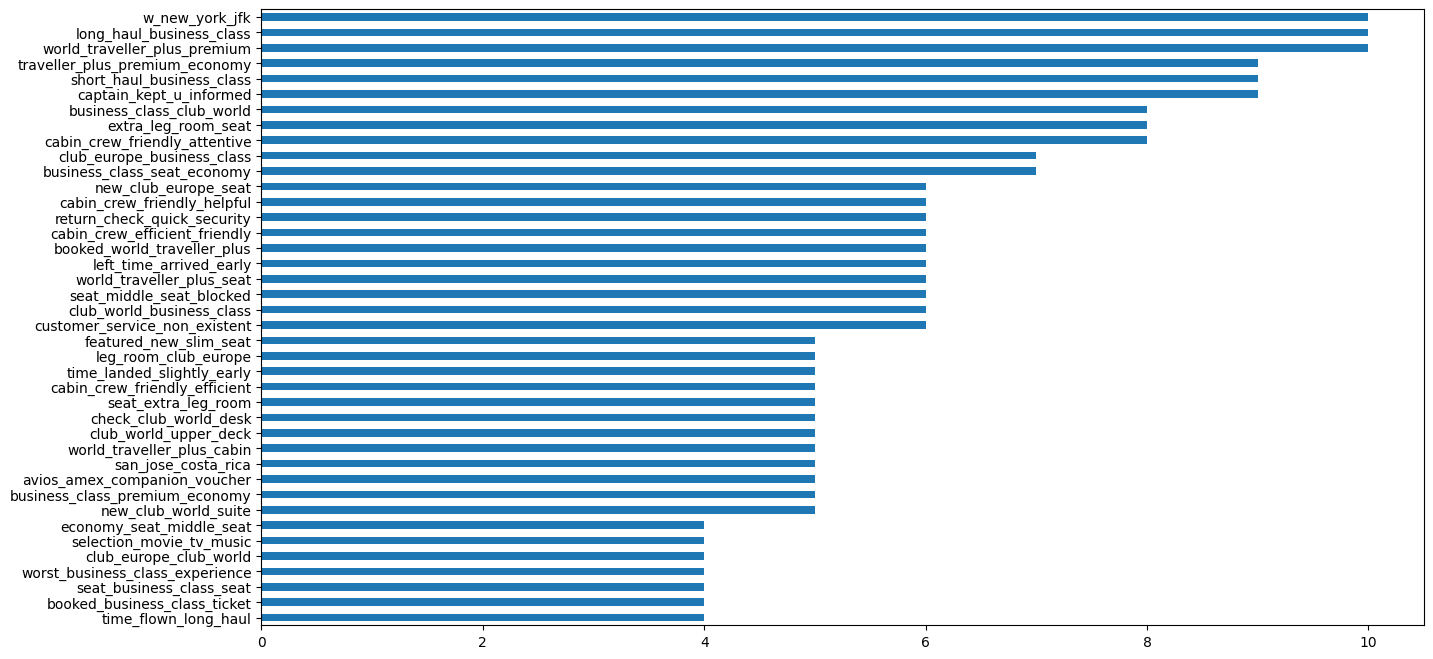

In [104]:
get_freq_dist(new_words, 4)

In [12]:
ratings_1_3 = df[df.stars.isin([1,2,3])]
ratings_4_6 = df[df.stars.isin([4,5,6])]
ratings_7_10 = df[df.stars.isin([7,8,9,10])]

In [18]:
ratings_1_3[:5]

,reviews,country,date,stars,verified,corpus
1,"not verified | flight delayed by an hour, it ...",united states,2023-08-12,2.0,False,flight delayed hour happens biggie u change ga...
2,not verified | the staff are very rude and not...,united kingdom,2023-08-11,2.0,False,staff rude trained properly exception made chi...
4,not verified | failed at all basic travel fund...,canada,2023-08-08,1.0,False,failed basic travel fundamental flight delayed...
5,✅ trip verified | they lost my baggage in a v...,poland,2023-08-08,1.0,True,lost baggage simple situation three week care ...
6,✅ trip verified | late boarding led to a one ...,united kingdom,2023-08-05,1.0,True,late boarding led one hour flight leaving two ...


In [13]:
reviews_1_3 = " ".join(ratings_1_3.corpus)
reviews_4_6 =" ".join(ratings_4_6.corpus)
reviews_7_10 =" ".join(ratings_7_10.corpus)

# split all the words into lists
words_1_3 = reviews_1_3.split(" ")
words_4_6 =reviews_4_6.split(" ")
words_7_10 =reviews_7_10.split(" ")

<Axes: >

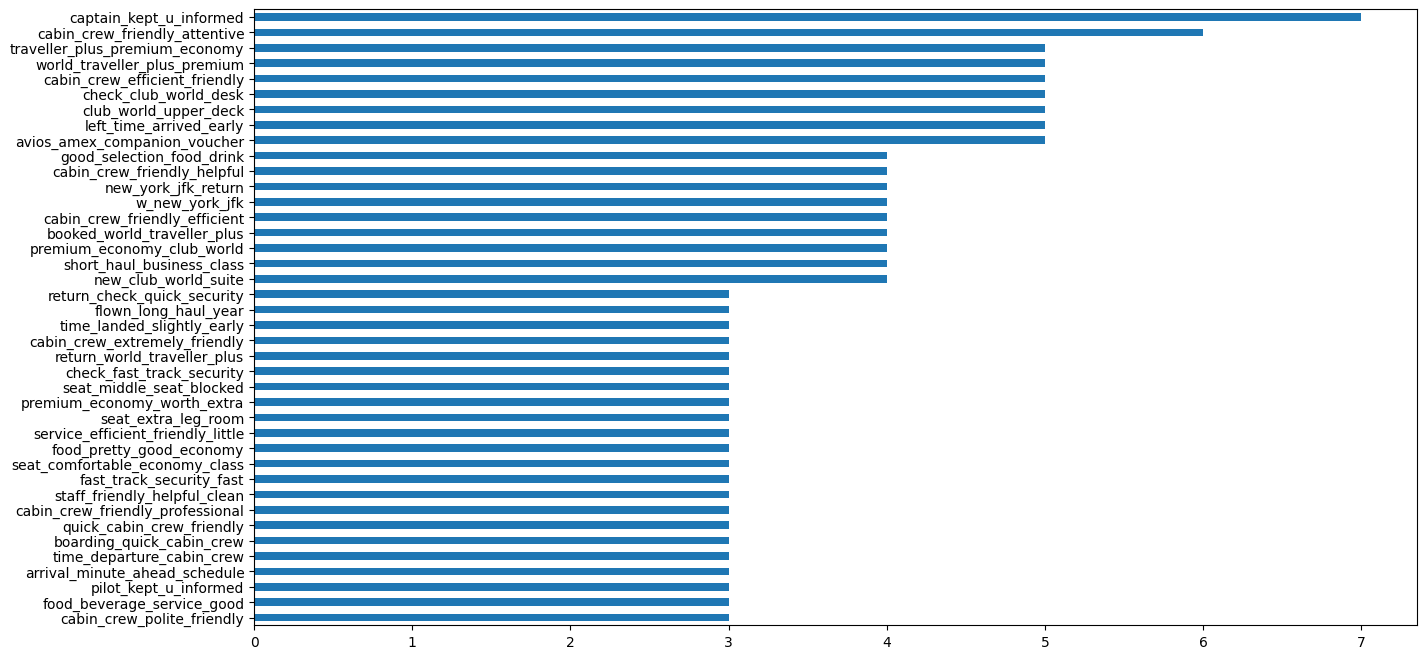

In [14]:
new_review_7_10 = [ word for word in words_7_10 if word not in stopwords]

get_freq_dist(new_review_7_10, 4)

<Axes: >

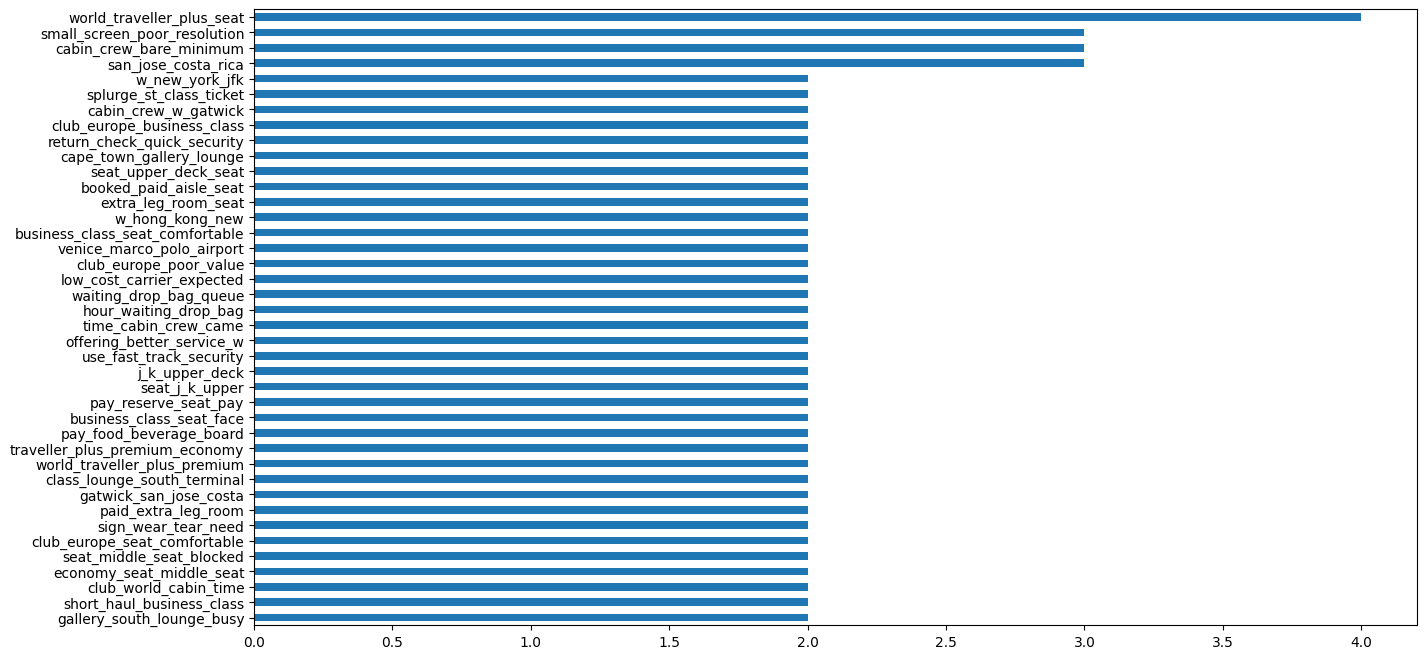

In [31]:
new_review_4_6 = [ word for word in words_4_6 if word not in stopwords]

get_freq_dist(new_review_4_6, 4)

In [15]:
# Use text blob to identify negativ or positive texts

from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer

In [40]:
%%capture

df['polarity'] = 0

for i in range(len(df.corpus)):
    sent = TextBlob(df.corpus[i])
    polarity = sent.sentiment.polarity
    subjectivity = sent.sentiment.subjectivity
    df['polarity'][i] = polarity


In [20]:
sent.sentiment

Sentiment(polarity=0.18806216931216932, subjectivity=0.44047619047619047)

In [42]:
df.head()

,reviews,country,date,stars,verified,corpus,polarity
0,✅ trip verified | easy check in a t5. galleri...,united kingdom,2023-08-13,8.0,True,easy check gallery south north lounge packed a...,0.188062
1,"not verified | flight delayed by an hour, it ...",united states,2023-08-12,2.0,False,flight delayed hour happens biggie u change ga...,0.225000
2,not verified | the staff are very rude and not...,united kingdom,2023-08-11,2.0,False,staff rude trained properly exception made chi...,-0.231250
3,✅ trip verified | good domestic flight operat...,united kingdom,2023-08-08,10.0,True,good domestic flight operated ba cityflyer gro...,0.236111
4,not verified | failed at all basic travel fund...,canada,2023-08-08,1.0,False,failed basic travel fundamental flight delayed...,-0.265714


In [45]:

print(f"{df[(df['polarity'] >-0.2) & (df['polarity'] <0.2)].shape[0]} number of reviews between -0.2 and 0.2 polarity score")
print(f"{df[(df['polarity'] >-0.1) & (df['polarity'] <0.1)].shape[0]} number of reviews between -0.1 and 0.1 polarity score")
print(f"{df[(df['polarity'] == 0)].shape[0]} number of reviews with 0 polarity score")


2411 number of reviews between -0.2 and 0.2 polarity score
1400 number of reviews between -0.1 and 0.1 polarity score
24 number of reviews with 0 polarity score
